In [60]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time

Some image examples: 
10_1473689520.jpg


35_1473690354.jpg


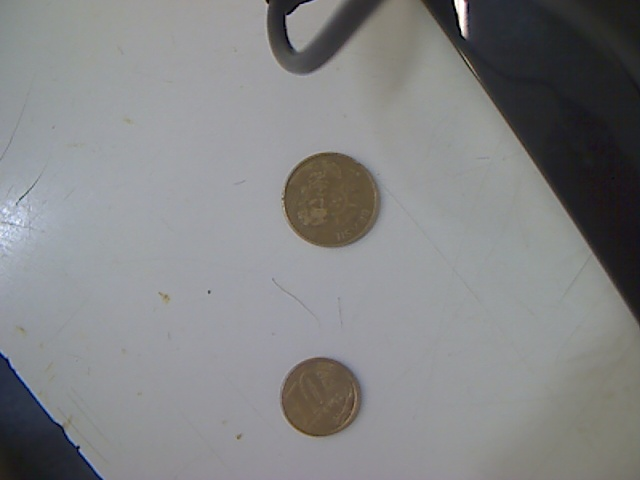

In [18]:
folder = "../data/deeplearning/all"
print("Some image examples: ")

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

for i in range(2):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i]))

In [25]:
train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))


from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#Medidas originais 
image_width = 640
image_height = 480
ratio = 4

image_width = 160
image_height = 120

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    #img = img.convert('L')
    # Transformando em Numpy Array
    x = img_to_array(img)  
    #print(x.shape)
    #x = x.reshape((1,) + x.shape)
    # Normalizando
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 100 == 0:
        print("%d images to array" % i)
    

Files in train_files: 290
100 images to array
200 images to array


In [26]:
from sklearn.cross_validation import train_test_split
#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)

In [27]:
print sum(y_train)/len(y_train)

62


In [56]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, image_height, image_width)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('linear'))
#model.add(Dropout(0.5))
model.add(Dense(1))


sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
    
#model.compile(loss='mse',
#              metrics=['accuracy'], optimizer='rmsprop')

model.compile(loss='mse', optimizer='adam')


model.fit(X_train, y_train, nb_epoch=30, batch_size=30,  validation_data=(X_test, y_test), verbose=1)

#model.load_weights(filename)

Train on 232 samples, validate on 58 samples
Epoch 1/30
232/232 [==============================] - 13s - loss: 11565.3997 - val_loss: 12953.4056
Epoch 2/30
232/232 [==============================] - 14s - loss: 9382.9171 - val_loss: 9912.8719
Epoch 3/30
232/232 [==============================] - 14s - loss: 6563.2887 - val_loss: 7914.7734
Epoch 4/30
232/232 [==============================] - 15s - loss: 5762.5571 - val_loss: 7220.6677
Epoch 5/30
232/232 [==============================] - 16s - loss: 4804.6447 - val_loss: 6535.5649
Epoch 6/30
232/232 [==============================] - 16s - loss: 3969.1307 - val_loss: 5832.9109
Epoch 7/30
232/232 [==============================] - 17s - loss: 3212.5028 - val_loss: 5261.0711
Epoch 8/30
232/232 [==============================] - 17s - loss: 2715.7818 - val_loss: 5150.0839
Epoch 9/30
232/232 [==============================] - 18s - loss: 2291.1297 - val_loss: 4723.0032
Epoch 10/30
232/232 [==============================] - 18s - loss: 2002

(faz tempo que esse link tá aqui, nem lembro mais se tinha algo importante)

http://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

In [32]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(input_dim = 1000, output_dim = 1000))
model.add(Activation('sigmoid'))
model.add(Dense(input_dim = 500, output_dim = 1))
model.add(Activation('linear'))

model.compile(loss='mse', optimizer='adam')

model.fit(X_train, y_train, nb_epoch=10, batch_size=5,  validation_data=(X_test, y_test), verbose=1)

Train on 232 samples, validate on 58 samples
Epoch 1/3
232/232 [==============================] - 71s - loss: 11541.0875 - val_loss: 14097.6741
Epoch 2/3
232/232 [==============================] - 100s - loss: 10595.8017 - val_loss: 13382.9469
Epoch 3/3
232/232 [==============================] - 115s - loss: 10092.9179 - val_loss: 12747.4773


### Resultados:
Imagem: normalizada, 160x120
Três épocas    
loss: 10092.9179 - val_loss: 12747.4773    
30 épocas  
loss: 17.9679 - val_loss: 3657.0876


In [61]:
start = time()
predictions = model.predict(X_test)
print("Tempo médio de previsão: {0:.2f}s".format((time() - start)/len(X_test)))

Tempo médio de previsão: 0.03s


In [58]:
print("{0:5} {1:10}".format("True", "Predicted"))
for i in range(len(predictions[:10])):
    print("{0:5} {1:10.2f}".format(y_test[i], predictions[i][0]))

    #print predictions[:5].transpose()
#print y_test[:5]

True  Predicted 
   25      -2.45
   30      38.59
   95     105.40
   35      53.92
   20      13.46
   15      44.27
   15       0.57
   30      60.68
   15      34.81
    5      14.50
